# Avacado Project

# Content

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Attribute Information

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Task:

Our task is to make a model that can consider the data provided and predict the Average Price.

# Importing requried Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
## Loading the dataset
df=pd.read_csv('Avocado.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
## Let's check the Shape of our dataset
df.shape

(16468, 14)

We have 16468 rows and 14 columns including Target column.

Average Price is our target atrribute.

In Problem Statement, we have to predict Average Price which is our target, so this is a Regression Problem Statement.

In [6]:
## Checking data Type 
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

We have one attribute of data time datatype.

All features have float datatype except region and type which are object data type.

year has a float data type we can convert it into int for model building.

All datatypes are ok.

In [7]:
## Getting Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


We can see that our we have 16468 rows present in our dataset but only 1517 columns contain the values. We also ckecked in Excel and raw csv file and found that there are so many empty rows with no values. We can consider them as null values.

In [8]:
## checking Null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [9]:
## Dropping null all values 
df_1=df.dropna()

In [10]:
df_1.shape

(1517, 14)

In [11]:
df_1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:title={'center':'NUll values Heatmap'}>

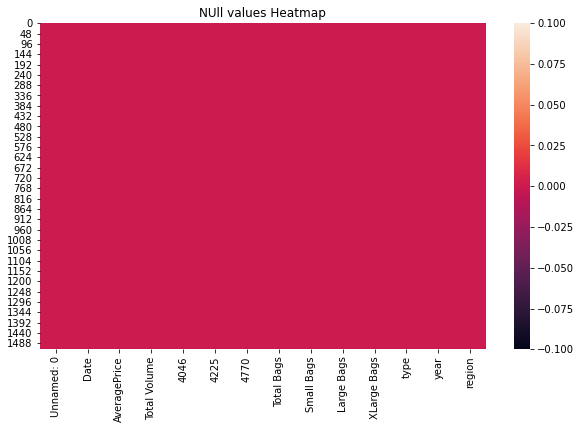

In [12]:
plt.figure(figsize=(10,6))
plt.title('NUll values Heatmap')
sns.heatmap(df_1.isnull())

Now there is no null values present in our dataset.

In [13]:
## Statistical Summary
df_1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:

1- We can see in Large Bages,XLarge Bags and 4770 Hass Avacado the Minimun values is Zero.

2-Our target Attribute AveragePrice is Normally Distributed.

3- Some Features are highly Right skewed like 4046,4225,Total bags etc.

4-The gap between 3rd quantile and Max values is very high in 4046,4225,Total bags and other skewed columns so it clearly indicates that outliers are present in out data.

In [14]:
df_1['Year']=pd.DatetimeIndex(df_1['Date']).year
df_1['Month']=pd.DatetimeIndex(df_1['Date']).month
df_1['day']=pd.DatetimeIndex(df_1['Date']).day

In [15]:
## Dropping the Unnecessary COlumns
df_2=df_1.drop(['Unnamed: 0','Date','year'],axis=1)

## I have dropped the columns Unnamed: 0 because it is just a counting number which has no significance in prediction

## I have droppend date column because we have extracted the Day, Month, Year seperatly from Date column.

## I have dropped year column because we get same columns Year y feature Extraction from our Date Column.

<AxesSubplot:title={'center':'Coreelation with Target'}>

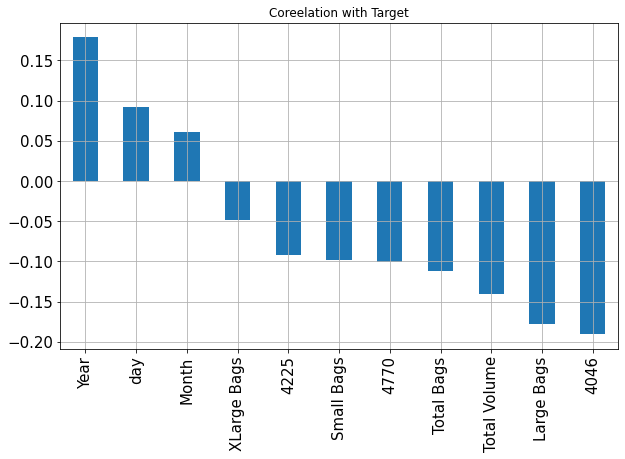

In [16]:
df_2.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)

We can see that only few features Feature positivly correlated with our Target Attribute AveragePrice.

But the correlation is not very strong enough.

Mostly features are negativly correlated with our Target attribute.

In [17]:
df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


# Categorical Columns

In [18]:
df_2['type'].unique()
## There is only one unique Value in Type columns which is conventional, we can drop. 

array(['conventional'], dtype=object)

In [19]:
df_2['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

# Data Visualization

<AxesSubplot:title={'center':'Price tread over the Year'}, xlabel='Year', ylabel='AveragePrice'>

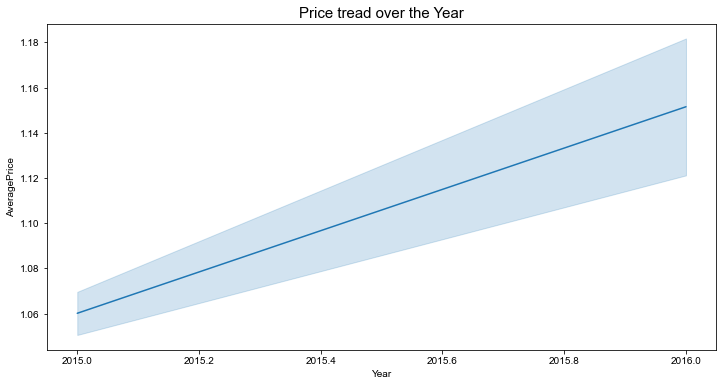

In [20]:
plt.figure(figsize=(12,6))
plt.title('Price tread over the Year',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_2['Year'],df_2['AveragePrice'],data=df_2)

There is a clear sign that prices of Avacado rises linearly from 2015 to 2016.



<AxesSubplot:title={'center':'Price tread Monthly'}, xlabel='Month', ylabel='AveragePrice'>

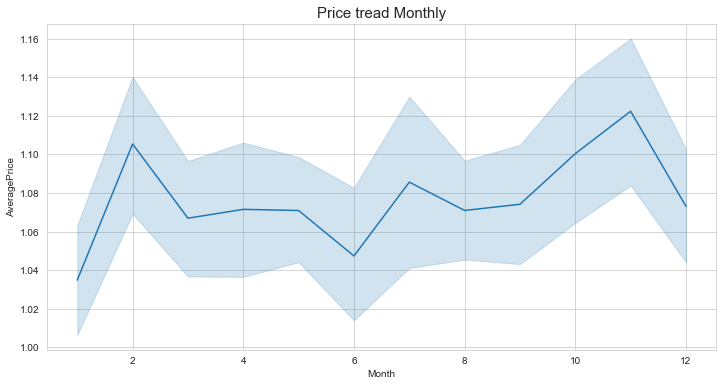

In [21]:
plt.figure(figsize=(12,6))
plt.title('Price tread Monthly',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_2['Month'],df_2['AveragePrice'],data=df_2)

from above trend we can see that the average price of Avacado rises in Feb and Nov Months of the year.

<AxesSubplot:title={'center':'Areawise Sales of Avacado in US'}, xlabel='region'>

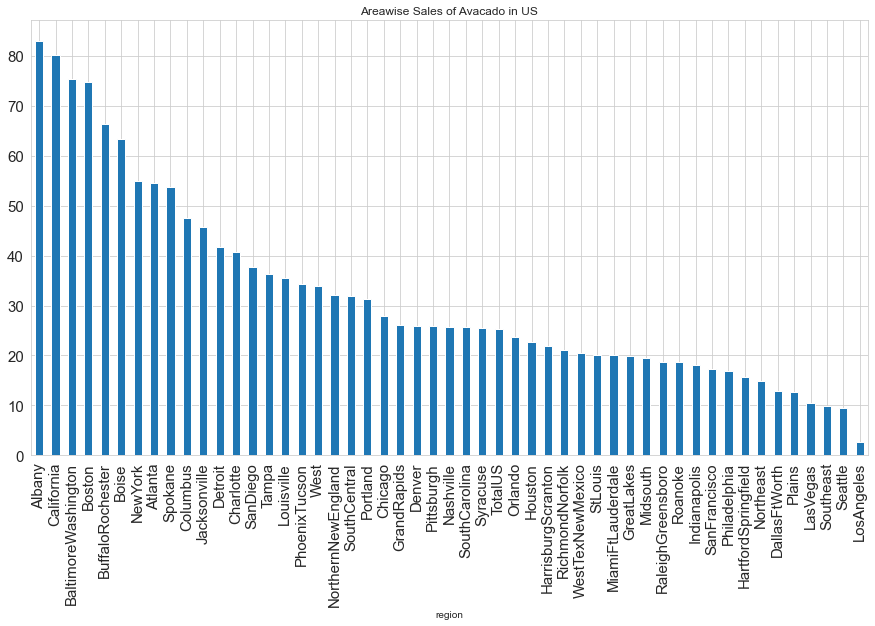

In [22]:
df_2.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),title='Areawise Sales of Avacado in US',fontsize=15)

Here we can see the trend of sales of Avacado in differen cities of US.

LogAngeles has least consumption/demand for Avacado.

<AxesSubplot:title={'center':' Price of Avacado in US'}, xlabel='region'>

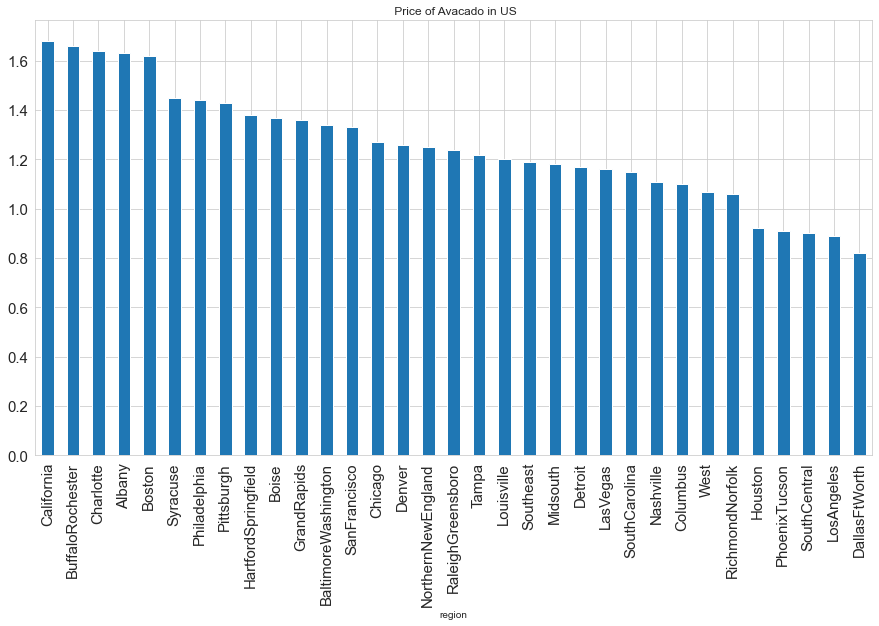

In [23]:
df_2.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(15,8),title=' Price of Avacado in US',fontsize=15)

Observation:
    
1- We can see that California has highest price of Avocado and dallasFtWorth has the lowest price of Avocado in US.


<AxesSubplot:title={'center':'Volumne VS Average Price'}, xlabel='AveragePrice', ylabel='Total Volume'>

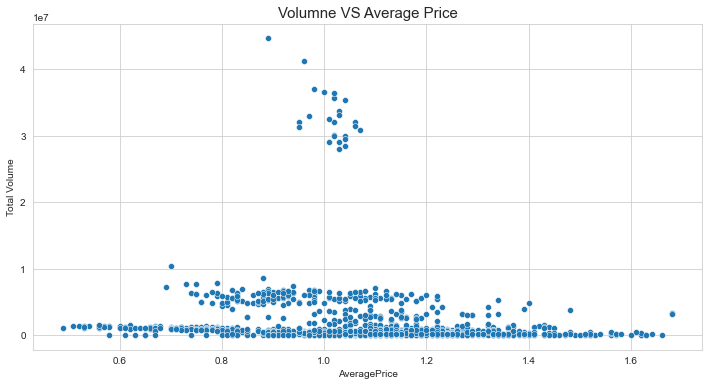

In [24]:
plt.figure(figsize=(12,6))
plt.title('Volumne VS Average Price',fontsize=15)
sns.scatterplot(df_2['AveragePrice'],df_2['Total Volume'],data=df_2)

We can observe that there is a constant line we get between Total Volumne and Average PRice.

Some outliers we can detect in Total Volumne

There is no linear relation exists between Average price and Total Volume.

<AxesSubplot:title={'center':'Avacado 4046 VS Average Price'}, xlabel='AveragePrice', ylabel='4046'>

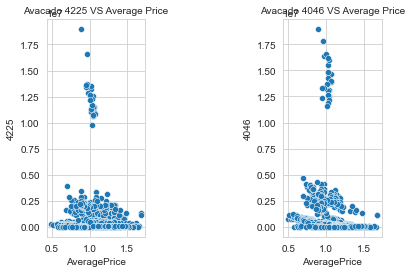

In [25]:
plt.subplot(1,3,1)
plt.title('Avacado 4225 VS Average Price',fontsize=10)
sns.scatterplot(df_2['AveragePrice'],df_2['4225'],data=df_2)

plt.subplot(1,3,3)
plt.title('Avacado 4046 VS Average Price',fontsize=10)
sns.scatterplot(df_2['AveragePrice'],df_2['4046'],data=df_2)

Two Different Avacado with Different Hass Code shows almost similar Average price.

We can conclude that both Hass Avacado has similar Average price but they are tagged differently.

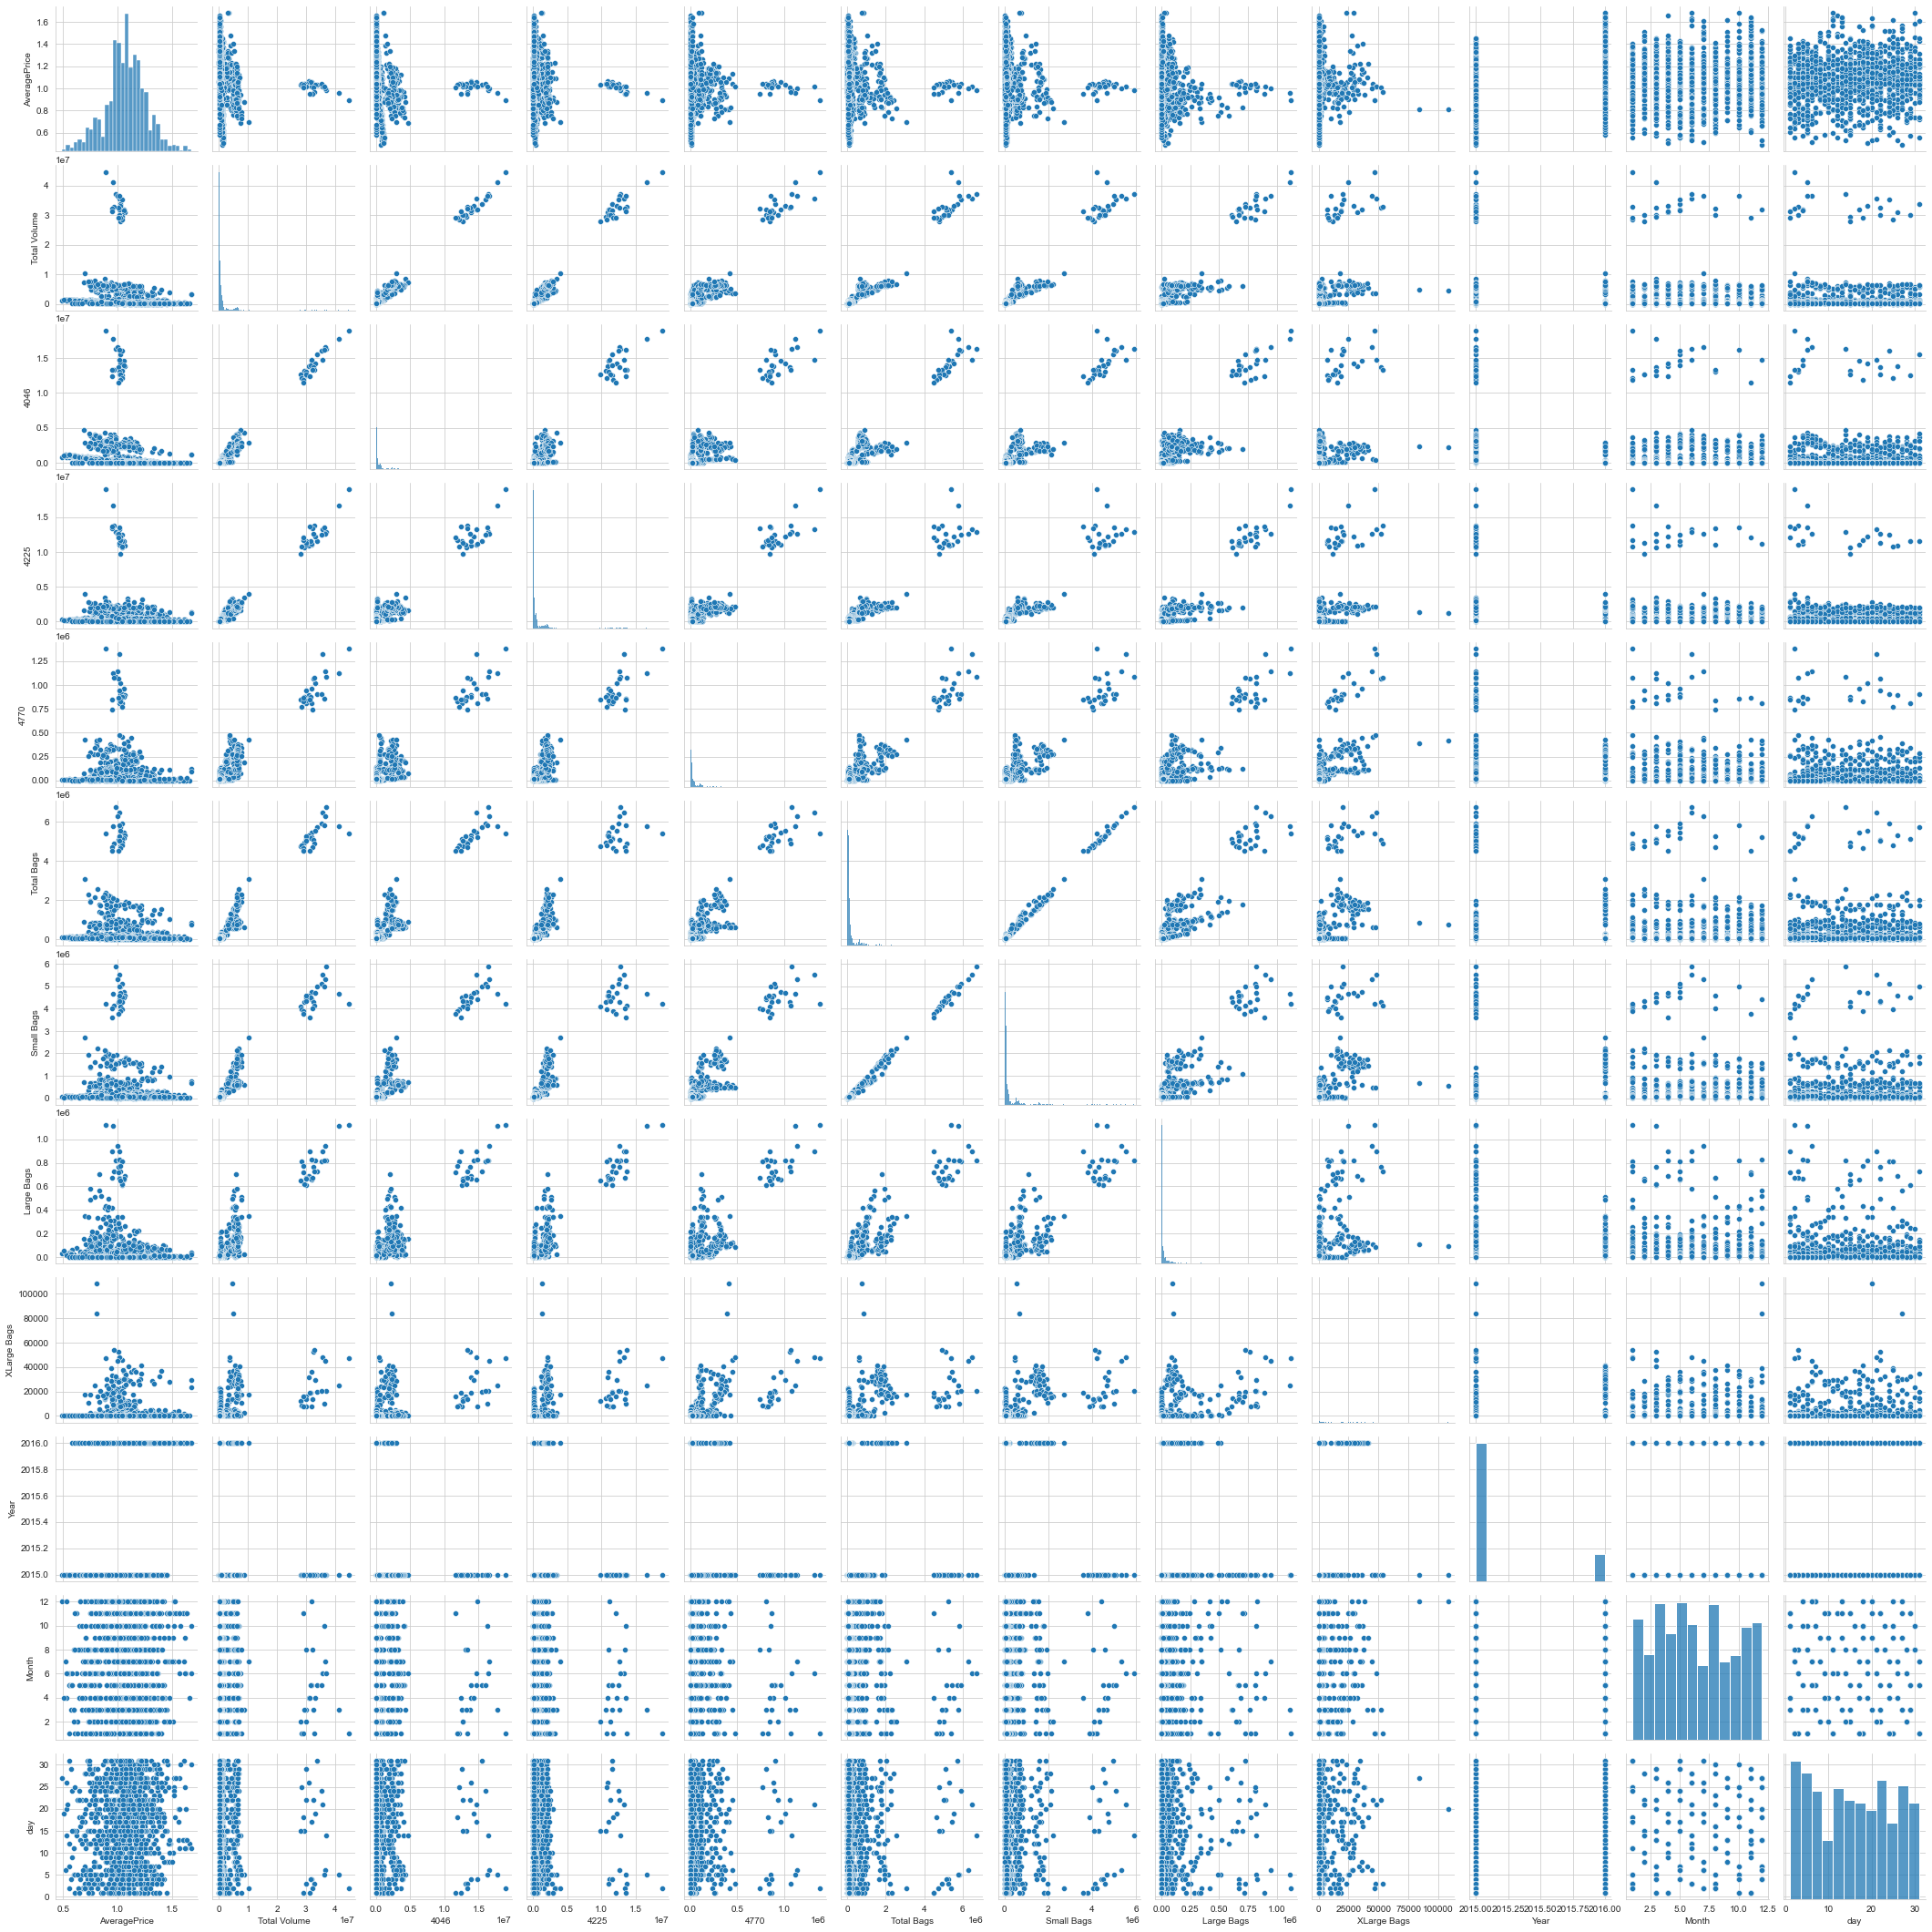

In [26]:
## Plotting all possible graphs by pairplot
sns.pairplot(df_2)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'.

These fields are some what showing positive or neutral correlation with each other.

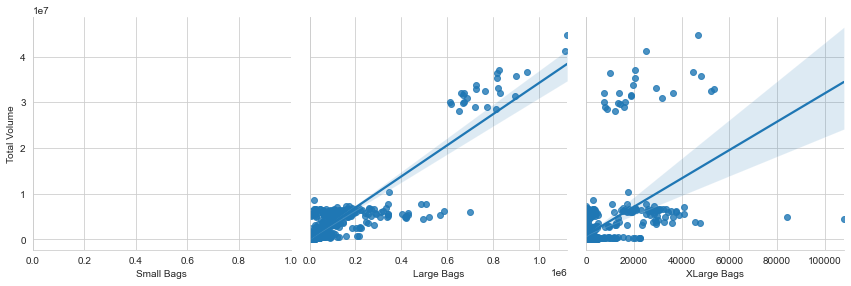

In [27]:
sns.pairplot(df_2,x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],y_vars='Total Volume',aspect=1,size=4,kind='reg',)

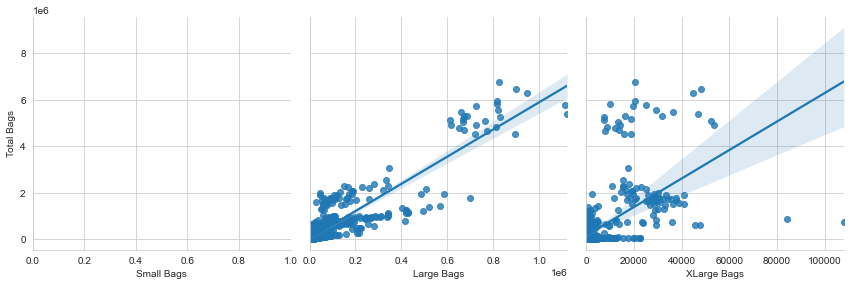

In [28]:
sns.pairplot(df_2, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

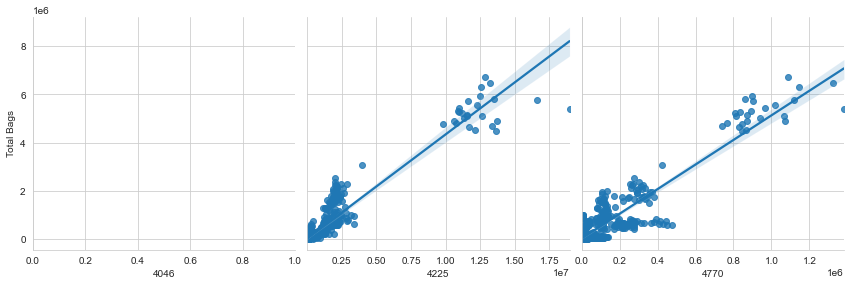

In [29]:
sns.pairplot(df_2, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', size=4, aspect=1, kind='reg')


Plotting the above graphs, in order to know that how the variables are corelating with "Total Volumes" and "Total Bags" field, where we see that :

Strong Positive correlation:

'4046', '4225', '4770'.

'Small Bags', 'Large Bags', 'XLarge Bags

# Data Distribution:

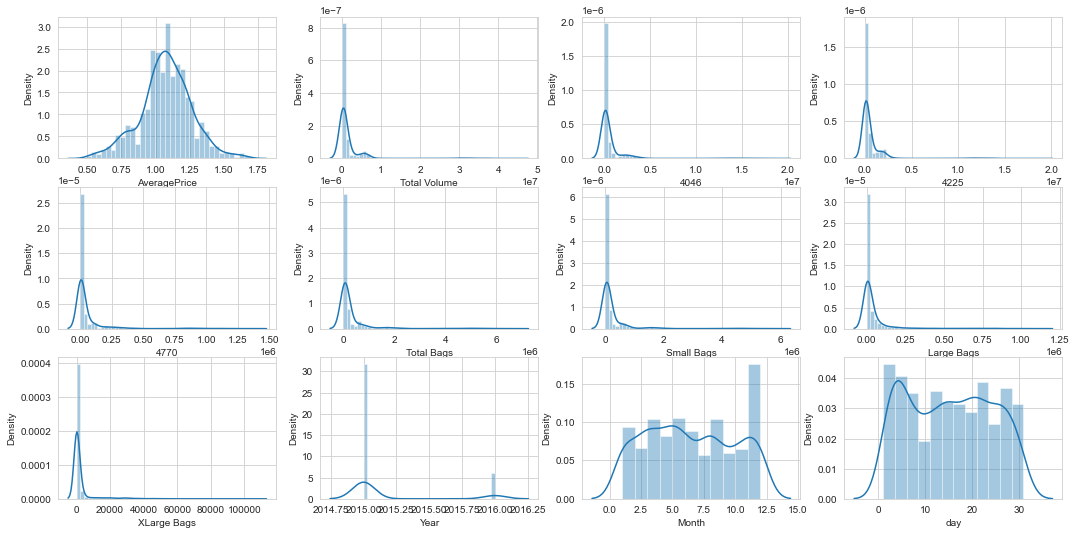

In [30]:
di=df_2.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()  

1-We can see that Our target attribute Average Price is Normally Distributed.

2- Total Volume,4046,4225,4770 Total bags,small bags,Large Bags and Xlarge Bags are Right Skewed.

3-All the right skewed distributed data has majority the values near to zero.

# Outliers Detection

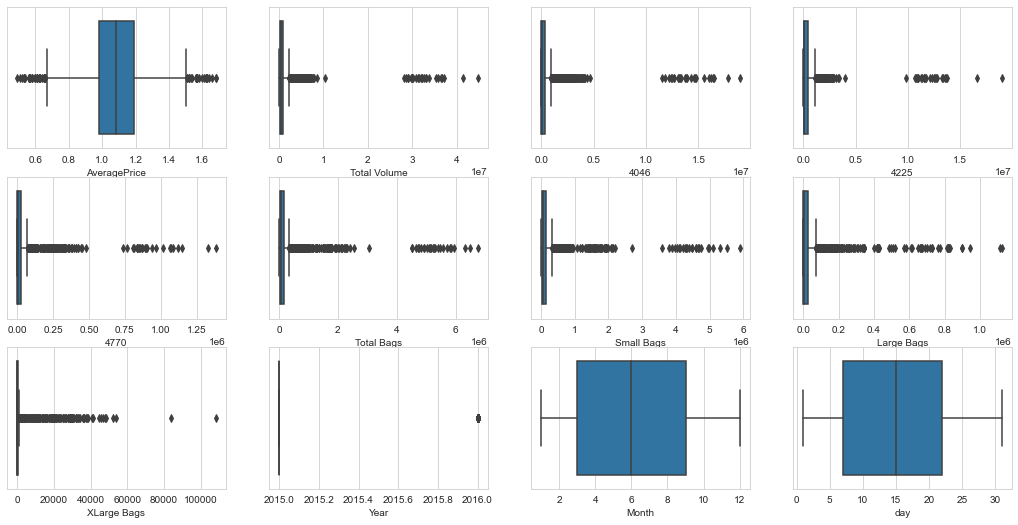

In [31]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show() 

There is a huge numbers of outliers present in our Dataset.

We can remove the outliers using IQR or Zscore method.

In [33]:
df_2.shape

(1517, 14)

In [34]:
df_2.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

# Removing Outliers by IQR Method

We can see in above distribution that most of our datapoints are right skewed. So to remove the outliers of skewed data we perfer IQR methods.

In [35]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

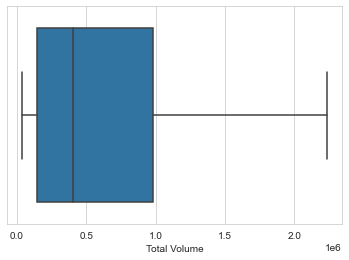

In [36]:
replace_outlier(df_2,'Total Volume')

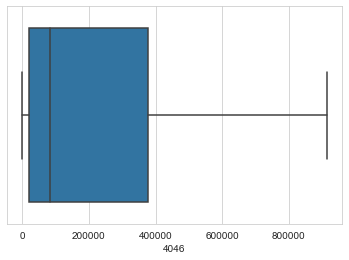

In [37]:
replace_outlier(df_2,'4046')

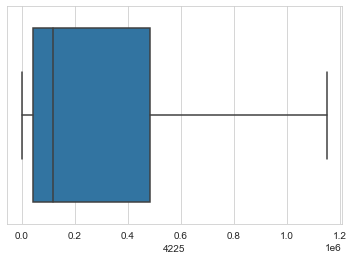

In [38]:
replace_outlier(df_2,'4225')

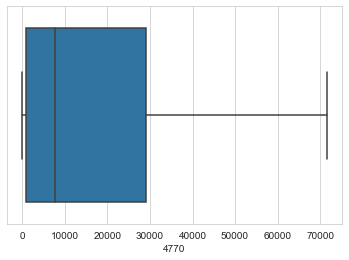

In [39]:
replace_outlier(df_2,'4770')

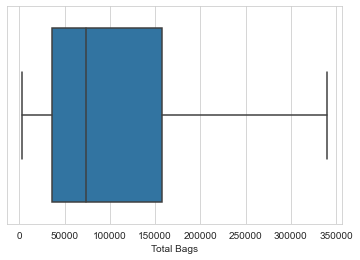

In [40]:
replace_outlier(df_2,'Total Bags')

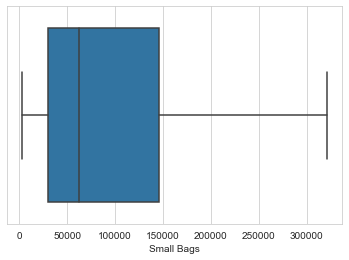

In [41]:
replace_outlier(df_2,'Small Bags')

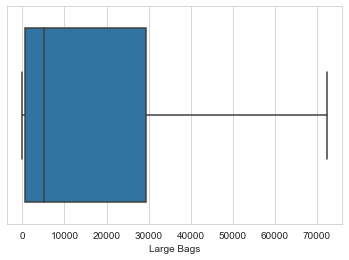

In [42]:
replace_outlier(df_2,'Large Bags')

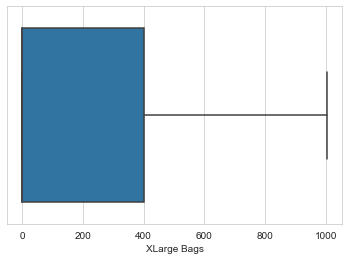

In [43]:
replace_outlier(df_2,'XLarge Bags')

In [45]:
df_2.shape

(1517, 14)

# Box Plot after Outliers Removal

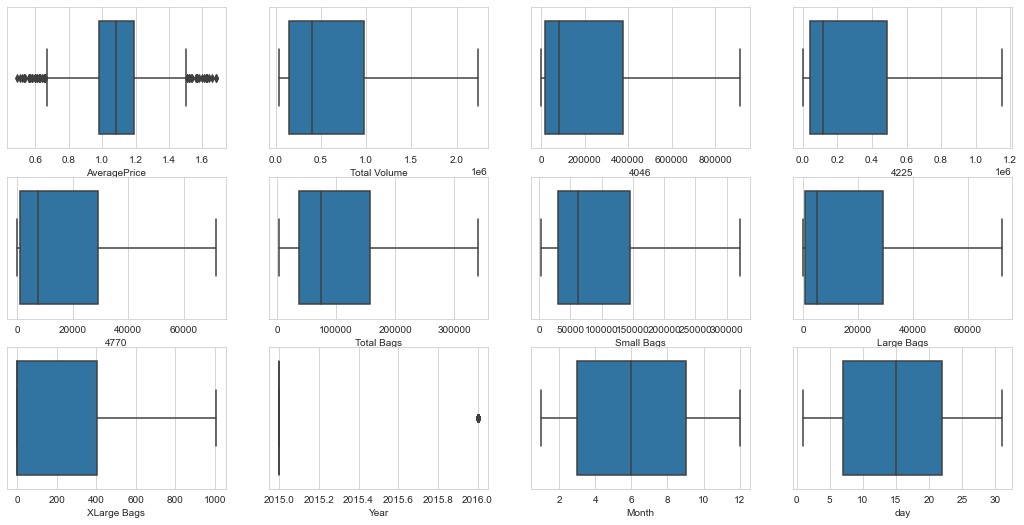

In [48]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()  

We have removed outliers using IQR method

# Skewness

In [49]:
df_2.skew()

AveragePrice   -0.109444
Total Volume    1.176935
4046            1.212500
4225            1.220883
4770            1.170573
Total Bags      1.104160
Small Bags      1.166098
Large Bags      1.230728
XLarge Bags     1.178417
Year            1.828332
Month           0.101439
day             0.041303
dtype: float64

In [50]:
## Removing skewness using log1p transformation
for i in di:
    if df_2[i].skew()>0.55:
        df_2[i]=np.log1p(df_2[i])

In [51]:
df_2.skew()

AveragePrice   -0.109444
Total Volume    0.001866
4046           -0.549613
4225           -0.202132
4770           -0.686219
Total Bags     -0.244284
Small Bags     -0.100335
Large Bags     -1.115955
XLarge Bags     0.528704
Year            1.828332
Month           0.101439
day             0.041303
dtype: float64

we have sucessfully removed the skewness to its possible extent.

In [52]:
df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,Albany,7.608871,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,Albany,7.608871,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,Albany,7.608871,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,Albany,7.608871,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,Albany,7.608871,11,29


# Encoding of Categorical Attribute

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_2['region']=le.fit_transform(df_2['region'])

In [54]:
df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,0,7.608871,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,0,7.608871,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,0,7.608871,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,0,7.608871,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,0,7.608871,11,29


# Splitting Data into Input and Output Variable

In [55]:
x=df_2.drop(['AveragePrice','type'],axis=1)
y=df_2[['AveragePrice']]

In [56]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,7.608871,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,7.608871,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,7.608871,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,7.608871,6,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,7.608871,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7,7.609367,10,16
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7,7.609367,9,10
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7,7.609367,2,10
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7,7.609367,9,25


In [57]:
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
1512,1.39
1513,1.51
1514,1.48
1515,1.47


# Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,-1.548337,-1.955648,-0.565814,-1.912255,-2.043697,-1.815651,-0.974454,-0.853129,-1.314338,-0.441008,1.624154,1.310530
1,-1.683771,-2.159638,-0.695519,-1.832466,-1.958777,-1.733744,-0.960971,-0.853129,-1.314338,-0.441008,1.624154,0.529537
2,-1.023750,-2.081733,-0.112066,-1.494747,-2.106270,-1.877485,-0.943880,-0.853129,-1.314338,-0.441008,1.624154,-0.251456
3,-1.370508,-1.913953,-0.383775,-1.741126,-2.428760,-2.196555,-0.864901,-0.853129,-1.314338,-0.441008,-0.104453,-0.363027
4,-1.746115,-2.001360,-0.707326,-1.723062,-2.369379,-2.148016,-0.745939,-0.853129,-1.314338,-0.441008,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.611872,-0.049376,-0.543297,0.581413,-0.208254,-0.224756,0.465448,1.007880,-0.880286,2.267532,1.047952,0.083255
1513,-0.670663,-0.183987,-0.593540,0.624805,-0.147799,-0.120533,0.408440,-0.853129,-0.880286,2.267532,0.759850,-0.586168
1514,-0.669819,-0.151804,-0.584799,0.561726,-0.161246,-0.143803,0.396136,1.425351,-0.880286,2.267532,-1.256858,-0.586168
1515,-0.619633,-0.078458,-0.576217,0.580532,-0.138324,-0.104766,0.396881,-0.853129,-0.880286,2.267532,0.759850,1.087389


# Feature Importance

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [60]:
print(extra.feature_importances_)

[0.09779853 0.32239598 0.08304144 0.07054083 0.06094907 0.07407044
 0.04606519 0.05642885 0.07014831 0.05070787 0.03598506 0.03186843]


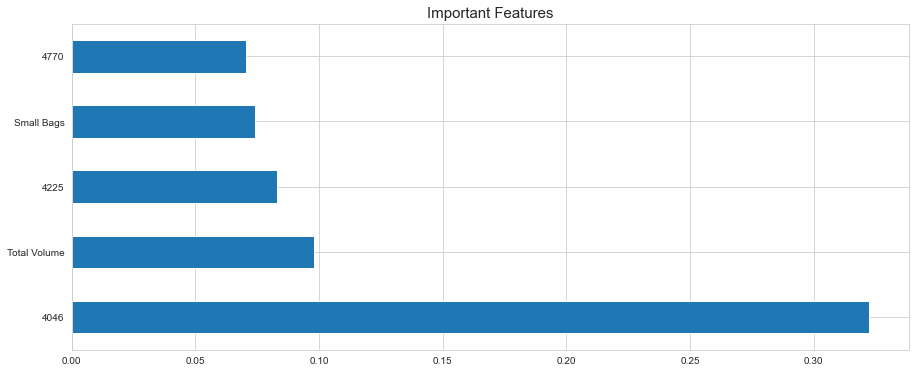

In [61]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

In [62]:
df_2.shape

(1517, 14)

Here we can see that Avocado Hass number 4046 is our most important features among all the features.

# PCA

In [65]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=12)

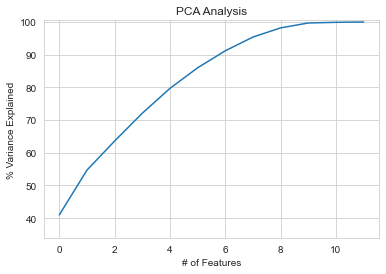

In [66]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Based on the plot above it's clear we should pick 9 features at 99% variance.

In [67]:
x.shape

(1517, 12)

In [68]:
pca=PCA(n_components=9)
x=pca.fit_transform(x)
x.shape

(1517, 9)

# Model Building

In [69]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [70]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r


max r2 score corresponding to 43 is 0.37805724955686615


cross validation score -7.21769954607804


Standard Deviation 14.375960324815212


Training accuracy 0.2999191519475993


Test Accuracy 0.3691925155156228


MAE 0.11616861235470266


MSE 0.02097931731443748


RMSE 0.144842387837392




43

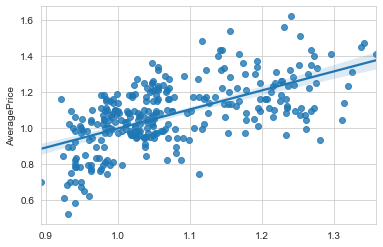

In [71]:
#LINERAR rEGRESSION
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 43 is 0.3779503618515526


cross validation score -5.975859170838603


Standard Deviation 11.894212951475119


Training accuracy 0.2999188824503164


Test Accuracy 0.36913838442965596


MAE 0.11616697316933897


MSE 0.02098111759940081


RMSE 0.14484860233844443




43

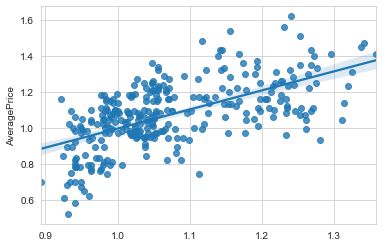

In [72]:
## Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 93 is 0.5457718277429418


cross validation score -0.8070896289056423


Standard Deviation 0.6129068063440357


Training accuracy 1.0


Test Accuracy 0.47488695437495787


MAE 0.09904605263157895


MSE 0.017464144736842106


RMSE 0.1321519759097158




93

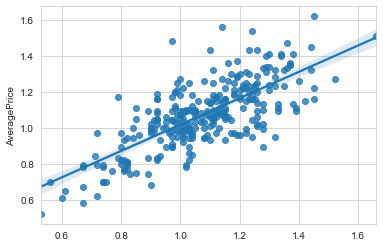

In [73]:
#### Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 92 is 0.7080764097554973


cross validation score 0.1846225820323967


Standard Deviation 0.10478758247841187


Training accuracy 0.7715113226486183


Test Accuracy 0.6968541605452362


MAE 0.07626973684210527


MSE 0.010081986842105263


RMSE 0.1004090974070839




92

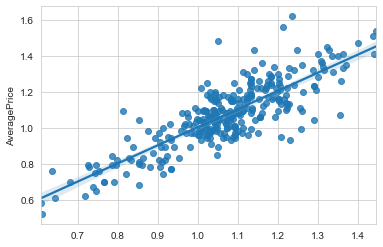

In [74]:
## KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 92 is 0.7378691177516234


cross validation score 0.25810519221490846


Standard Deviation 0.19429561123075859


Training accuracy 0.7741940291341541


Test Accuracy 0.6661520770674934


MAE 0.08238078990207771


MSE 0.0111030729378424


RMSE 0.10537112003695509




92

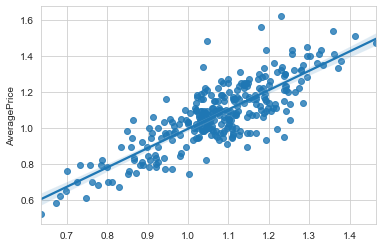

In [75]:
##SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 89 is 0.7604187412083522


cross validation score 0.11289368673954073


Standard Deviation 0.1375780731739378


Training accuracy 0.9509197238229853


Test Accuracy 0.6956723866679809


MAE 0.07612171052631575


MSE 0.01012129013157894


RMSE 0.1006046228141577




89

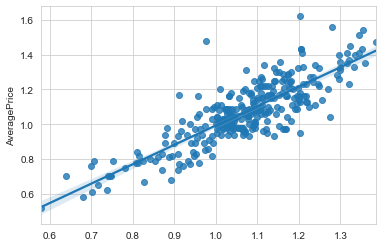

In [76]:
## random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 89 is 0.5491203946556988


cross validation score 0.10722967508829576


Standard Deviation 0.1577874096736751


Training accuracy 0.5358265209625133


Test Accuracy 0.4413845651915459


MAE 0.10876968099818411


MSE 0.018578363053457506


RMSE 0.13630246899252232




89

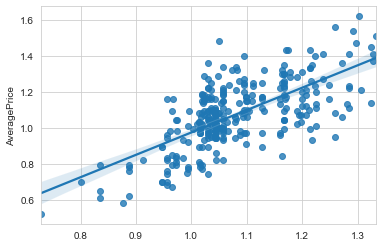

In [77]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,x,y)

max r2 score corresponding to 87 is 0.671534547989872


cross validation score 0.1433864857380978


Standard Deviation 0.09711942528870474


Training accuracy 0.7771486930381871


Test Accuracy 0.6475054266774214


MAE 0.08603781043624537


MSE 0.011723220930703422


RMSE 0.10827382384816481




87

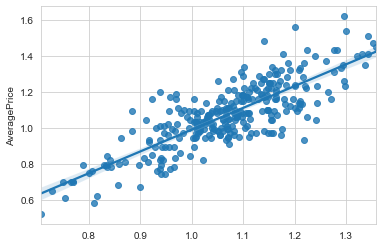

In [78]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

We can see from above all the Models that the K-Nearest Neighbours gives us a Maximun R2 score. Additionally, the training and Testing accuracy is also good as comapired to other models.RMSE error and MAE is also lowest among other models.
So we will choose this as our model and do Hyperparameter Tuning for the same.

# Hyperparameter Tuning.

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92,test_size=.20)
param={'n_neighbors':range(5,21),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'n_jobs':[-1]}
glf=GridSearchCV(knn,param,scoring='r2')
glf.fit(x_train,y_train)
glf.best_params_

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}

In [85]:
knn_r=KNeighborsRegressor(algorithm='auto',n_jobs=-1,n_neighbors=5,weights='distance')
knn_r.fit(x_train,y_train)
pred=knn_r.predict(x_test)
print('Training accuracy',knn_r.score(x_train,y_train))
print('Testing Accuracy',knn_r.score(x_test,y_test))
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 Score',r2_score(pred,y_test))

Training accuracy 1.0
Testing Accuracy 0.7189023778125367
MAE 0.07727389734123055


MSE 0.009968413476863601


RMSE 0.09984194247340945


R2 Score 0.5587525220731104


We can see that by Hyperparameter tuning our Training and Test both accuracy has improved. Additionally, mean absolute error,Root mean squared error also decrease from earlier hence we will save this as our best model.

# Model Saving

In [86]:
import joblib
joblib.dump(knn_r,'Avocadoknn_r.pkl')

['Avocadoknn_r.pkl']

In [87]:
loaded_model=joblib.load('Avocadoknn_r.pkl')
prediction=loaded_model.predict(x_test)